In [82]:
import seaborn as sns
from IPython.display import Markdown
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics in Italy
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed
as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
italy_region_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'TotalPositiveCases']].style.background_gradient(cmap=cm).hide_index()


# COVID-19 statistics in Italy
## Last Updated: 2020-03-15 17:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed
as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases


RegionName,TotalPositiveCases
Lombardia,13272
Emilia Romagna,3093
Veneto,2172
Marche,1133
Piemonte,1111
Toscana,781
Liguria,559
Lazio,436
P.A. Trento,378
Friuli Venezia Giulia,347


In [83]:
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'ProvinceName', 'TotalPositiveCases']][:20].style.background_gradient(cmap=cm).hide_index()

RegionName,ProvinceName,TotalPositiveCases
Lombardia,Bergamo,3416
Lombardia,Brescia,2473
Lombardia,Cremona,1792
Lombardia,Milano,1750
Lombardia,Lodi,1320
Emilia Romagna,Piacenza,1012
Lombardia,Pavia,722
Marche,Pesaro e Urbino,712
Emilia Romagna,Parma,662
Veneto,Padova,658


In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [85]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [86]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [87]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-15 17:00:00
(441, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,441.0,168.446712,649.869992,0.0,1.0,8.0,64.0,6267.0
Deaths,441.0,19.875283,103.391337,0.0,0.0,0.0,3.0,1218.0
TotalPositiveCases,441.0,329.138322,1233.993654,0.0,3.0,19.0,143.0,13272.0
TestsPerformed,441.0,2120.403628,5300.473114,0.0,46.0,302.0,1419.0,40369.0


In [88]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-15 17:00:00
TotalHospitalizedPatients                   6267
Deaths                                      1218
TotalPositiveCases                         13272
TestsPerformed                             40369
dtype: object

In [89]:
display(Markdown("""
### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at {last_date}). 
""".format(last_date=last_date)))


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at 2020-03-15 17:00:00). 


In [90]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

429                Lombardia
425           Emilia Romagna
440                   Veneto
430                   Marche
432                 Piemonte
436                  Toscana
428                  Liguria
427                    Lazio
437              P.A. Trento
426    Friuli Venezia Giulia
424                 Campania
433                   Puglia
422             P.A. Bolzano
435                  Sicilia
438                   Umbria
420                  Abruzzo
434                 Sardegna
423                 Calabria
439            Valle d'Aosta
431                   Molise
421               Basilicata
Name: RegionName, dtype: object

# Statistics per region

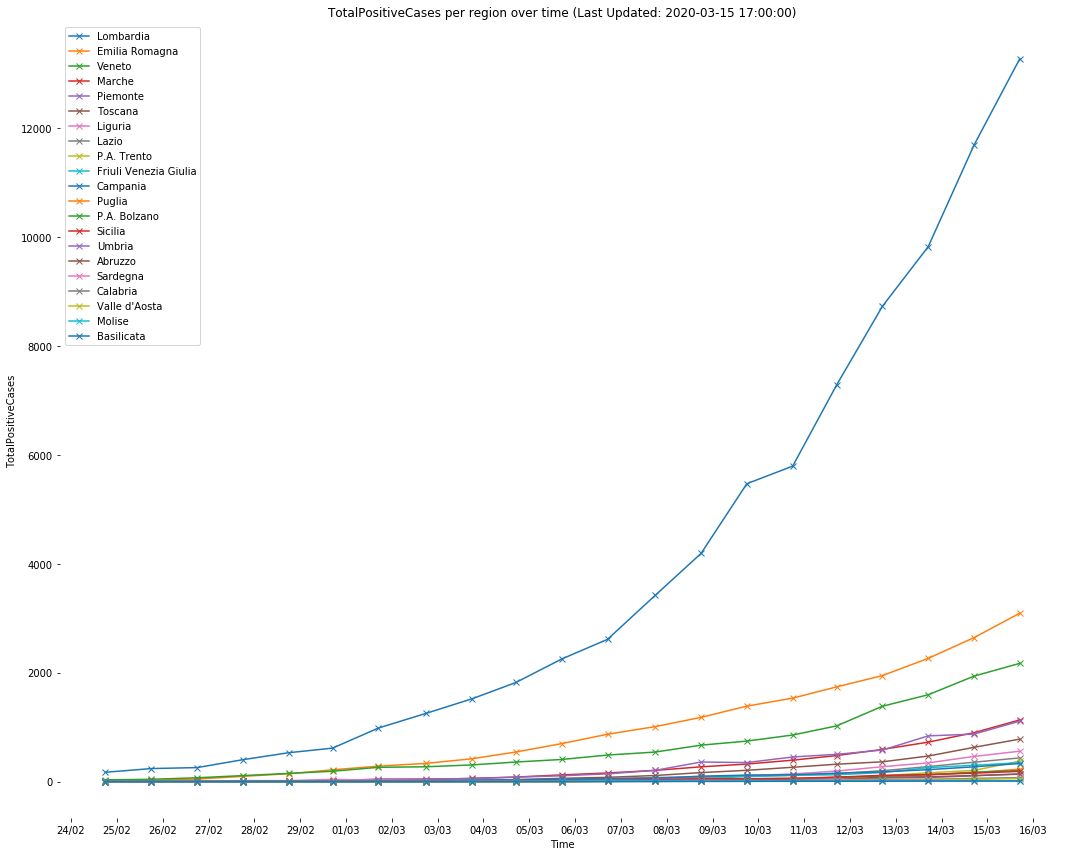

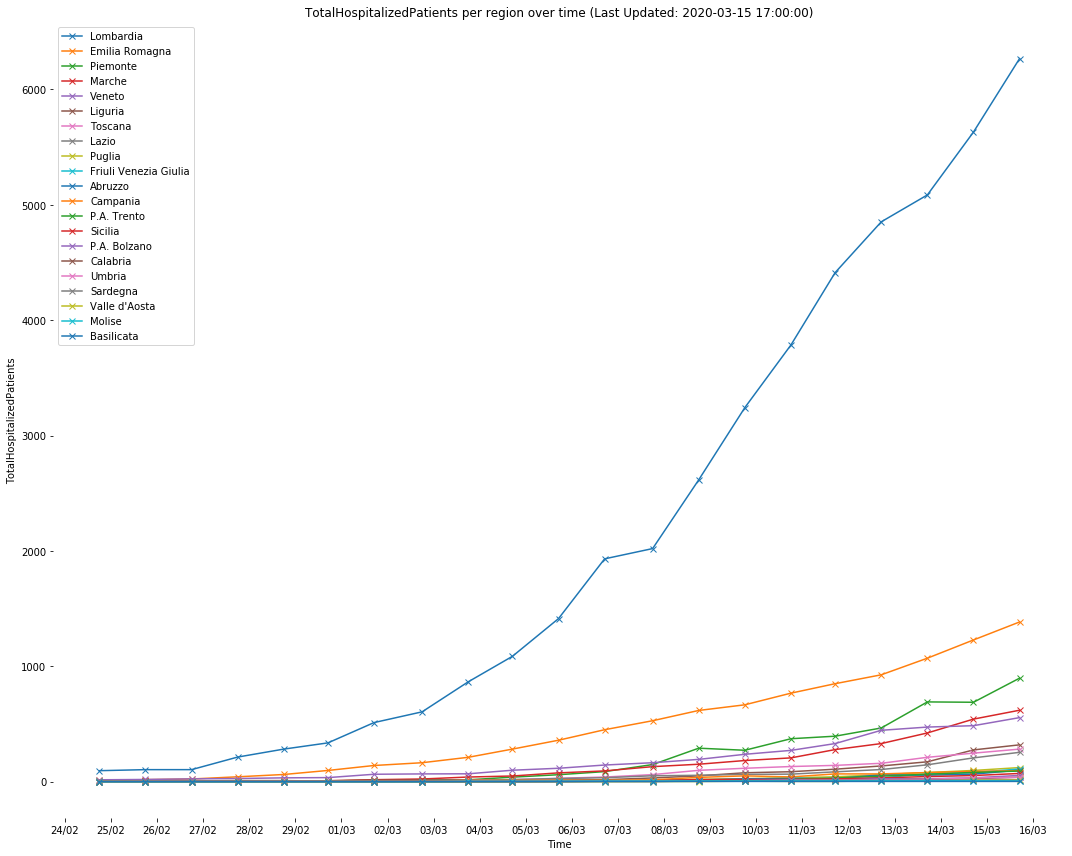

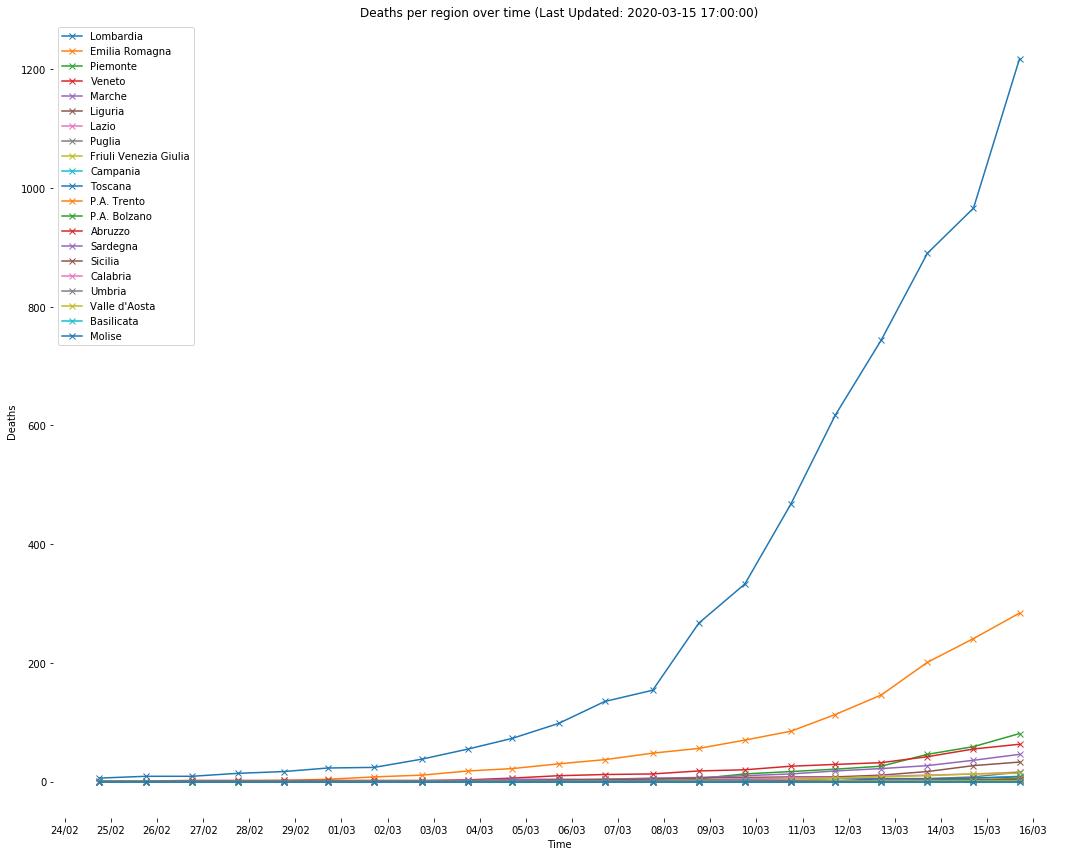

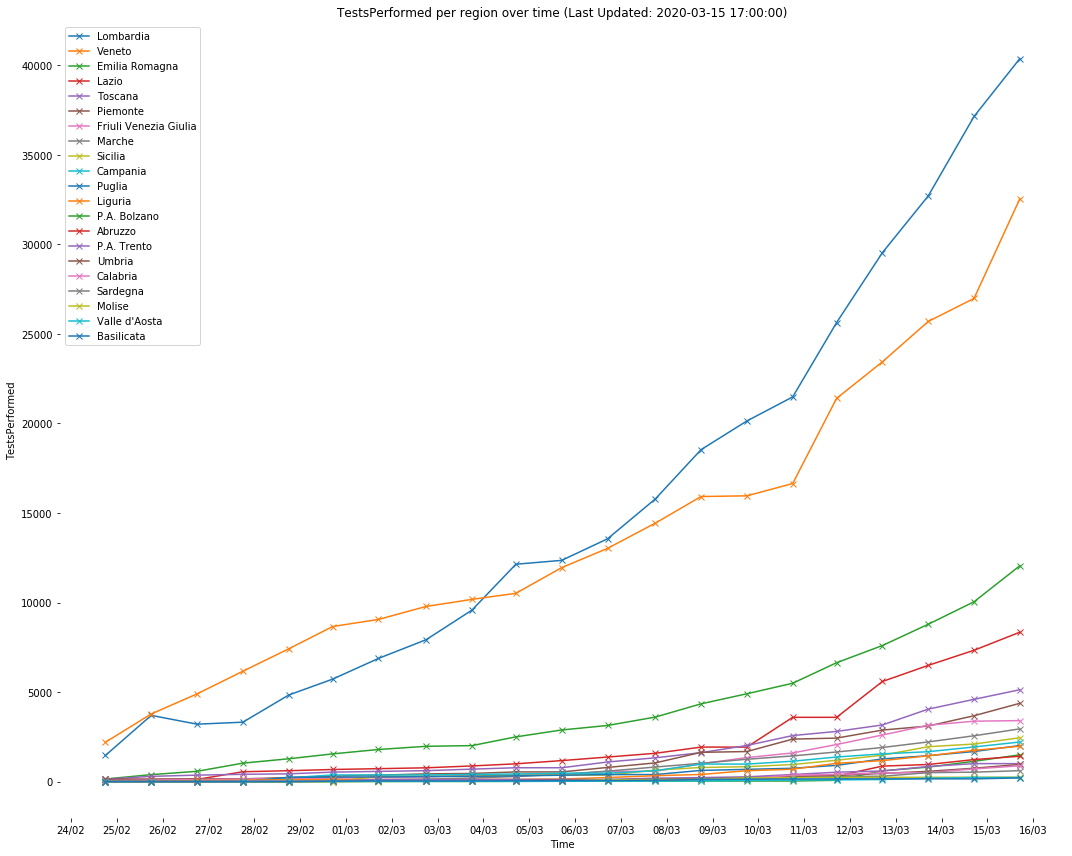

In [91]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [92]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]

# Regional geolocation

In [93]:
import folium
# may require pip install folium
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/350,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [94]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]

# Provincial geolocation

In [95]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map